In [1]:
from midifile import *
import numpy as np
import pandas as pd

In [2]:
fileNames = [fileName for fileName in os.listdir("midiIn") if 'Bach' in str(fileName)]
fileNames

['Bach_Cantate_BWV20.mid',
 'Bach_Cantate_BWV33.mid',
 'Bach_Cantate_BWV8.midi',
 'Bach_Christ_Lay_Bonds_Death_BWV4.mid',
 'Bach_How_Brightly_Shines_Morning_Star_BWV1.mid',
 'Bach_My_Heart_Ever_Faithful_BWV34.mid']

In [3]:
mf = midiFile(fileNames[-1])

Converting to CSV


/Users/zachariahmiller/Documents/Projects/NNCompose/midifile.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  beats['note_length'] = beats.beat/self.qn*4
/Users/zachariahmiller/Documents/Projects/NNCompose/midifile.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  beats['note_length'] = beats.note_length.astype(int)


In [4]:
mf.df.note_length.value_counts()

1.0    601
2.0    594
4.0     58
7.0      2
3.0      2
8.0      1
Name: note_length, dtype: int64

In [7]:
sl=20
X,Y = mf.get_trainable_arrays(seq_length=sl,col='note_length')
data_seed = X[0]
data_seed = np.reshape(data_seed, (1, sl, 1))
target = mf.encode_target(Y,n_values=16)

X & Y Correlation:
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  4.] 4.0 
Actual Data Correlation:
 [ 2.  4.  4.]


In [8]:
print(Y[0],target[0])

4.0 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [13]:
####### For Training across all songs in the fileNames list
#######
from neuralnet import *

sl = 20
X = np.empty(shape=(10, sl, 1)) # shape[0] doesn't matter to the model
model = timing_network(X)
data_seeds = []
for track in fileNames:
    mf = midiFile(track)
    X,Y = mf.get_trainable_arrays(seq_length=sl,col='note_length')
    data_seed = X[0]
    data_seed = np.reshape(data_seed, (1, sl, 1))
    data_seeds.append(data_seed)
    target = mf.encode_target(Y,n_values=16)
    model.train(X,target,epochs=10,batch_size=5,filepath="recent_lstm_timing_model_weights.h5")

Converting to CSV


/Users/zachariahmiller/Documents/Projects/NNCompose/midifile.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  beats['note_length'] = beats.beat/self.qn*4
/Users/zachariahmiller/Documents/Projects/NNCompose/midifile.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  beats['note_length'] = beats.note_length.astype(int)


X & Y Correlation:
 [ 4.  2.  2.  4.  4.  4.  2.  4.  2.  4.  4.  4.  4.  2.  2.  8.  8.  8.
  4.  4.] 4.0 
Actual Data Correlation:
 [ 4.  4.  4.]
Epoch 1/10
129/129 [==============================] - 6s - loss: 1.5927     
Epoch 2/10
129/129 [==============================] - 4s - loss: 1.3143     
Epoch 3/10
129/129 [==============================] - 4s - loss: 1.2662     
Epoch 4/10
129/129 [==============================] - 4s - loss: 1.2729     
Epoch 5/10
129/129 [==============================] - 4s - loss: 1.2411     
Epoch 6/10
129/129 [==============================] - 4s - loss: 1.1845     
Epoch 7/10
129/129 [==============================] - 4s - loss: 1.1602     
Epoch 8/10
129/129 [==============================] - 4s - loss: 1.1474     
Epoch 9/10
129/129 [==============================] - 4s - loss: 1.1362     
Epoch 10/10
129/129 [==============================] - 4s - loss: 1.0971     
Converting to CSV
X & Y Correlation:
 [ 4.  3.  3.  4.  4.  2.  2.  2.  4.  4.  2

In [25]:
for x in model.model.predict(X):
    print(np.argmax(x)+1)

4
4
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
4
4
4
1
2
2
1
1
1
1
1
1
2
2
2
2
2
2
1
1
1
2
2
1
1
1
2
2
2
2
1
1
1
2
2
2
4
4
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
1
1
1
1
1
1
1
1
2
2
2
2
2
2
1
1
1
1
2
2
2
2
2
4
2
2
2
1
1
1
1
2
2
2
2
2
2
2
2
2
1
1
1
1
2
2
2
2
2
2
4
4
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
4
4
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
4
4
4
1
2
2
1
1
1
1
1
1
2
2
2
2
2
2
1
1
1
2
2
1
1
1
2
2
2
2
1
1
1
2
2
2
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
1
1
1
2
2
2
2
2
1
1
1
1
1
1
1
2
2
2
2
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
2
2
2
2
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
2
2
2
1
1
1
1
1
2
2
2
2
2
1
1
1
1
1
2
2
2
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
4
4
1
1
1
1
1
1
1
1
1
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
1
1
1
1
1
1
1
1
1
1
1
2
2
2
1
1
1
1
1
1
2
2
2
2
2
2
1
1
1
1
1
2
2
2
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
1
1
1
1
1
1
2
2
1
1
1
1
2
2
2
2
2
4
2
2
2
2
2
2
2
2
2
2


In [29]:
preds = model.model.predict(X)
plot_results = []
for p in preds:
    plot_results.append(np.argmax(p)+1)

In [44]:
yes = 0
count = 0
for i,j in zip(Y,preds):
    y = np.argmax(j)+1
    if i==y:
        yes+=1
    count+=1
print(float(yes/count))

0.8554119547657512


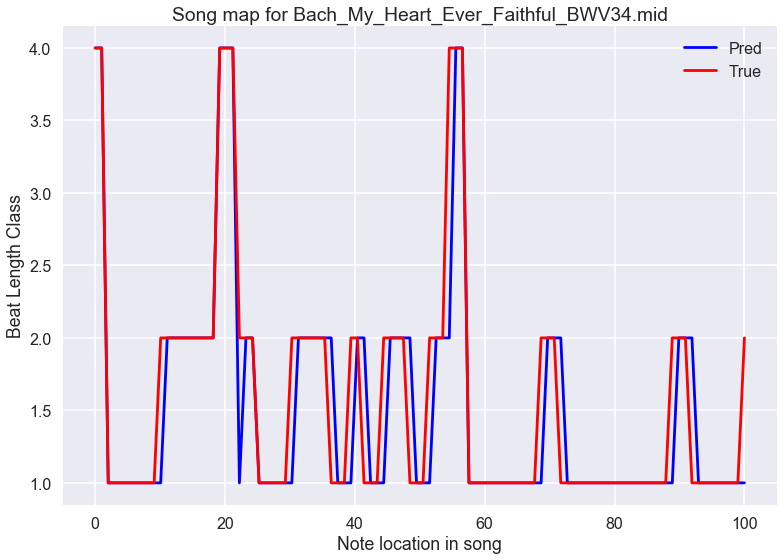

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("seaborn-poster")

lowx = 0
highx = 100
plt.plot(np.linspace(0,len(plot_results[lowx:highx]),len(plot_results[lowx:highx])),plot_results[lowx:highx],'b',label="Pred")
plt.plot(np.linspace(0,len(Y[lowx:highx]),len(Y[lowx:highx])),Y[lowx:highx],'r',label="True");
plt.xlabel("Note location in song")
plt.ylabel("Beat Length Class")
plt.title("Song map for %s"%mf.fname)
plt.legend()

In [38]:
pl_results = []
results = []
data_seed = X[0]
for i in range(2000):
    if i%500==0:
        print("Generating point ",i)
    data_seed = np.reshape(data_seed, (1, sl, 1))
    next_val = model.model.predict(data_seed)
    next_val = np.argmax(next_val)+1
    pl_results.append(next_val)
    next_val = np.reshape(next_val,(1))
    data_seed = data_seed[0].tolist()
    data_seed.append([next_val])
    data_seed = data_seed[1:len(data_seed)]

Generating point  0
Generating point  500
Generating point  1000
Generating point  1500


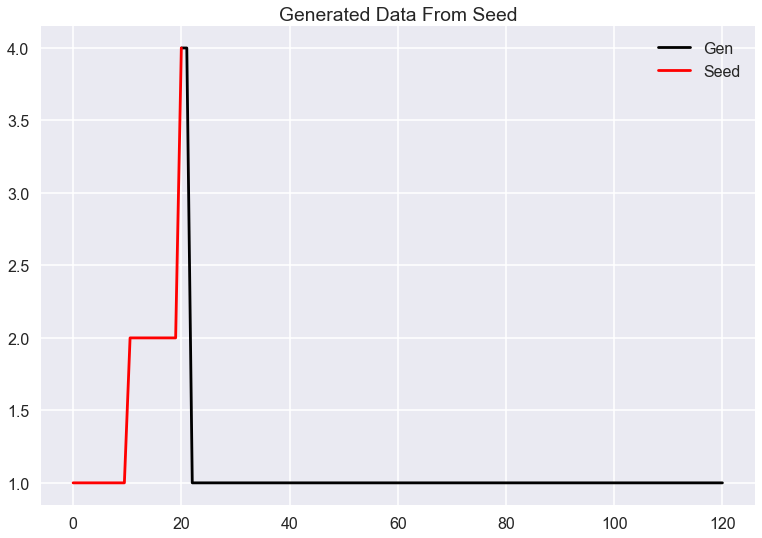

In [39]:
lowx = 0
highx = 100
data = data_seed
plt.plot(np.linspace(0,len(pl_results[lowx:highx]),len(pl_results[lowx:highx]))+sl,pl_results[lowx:highx],'k',label="Gen")
plt.plot(np.linspace(0,len(X[0][0:sl]),len(X[0][0:sl])),X[0][0:sl],'r',label="Seed");
plt.title("Generated Data From Seed")
plt.legend()

# Figuring the beat timing stuff out for later use (used in above testing)

In [14]:
timing = mf.timing_df.sort_values(by=['note','timing'])
timing['length'] = timing.timing.diff()
timing['beat'] = timing.length.shift(-1)
timing

,instrument,timing,cmd,pitchshift,note,velocity,timeSig,length,beat
398,2,15480,Note_on_c,0,41.0,111.0,NaN,NaN,120.0
399,2,15600,Note_off_c,0,41.0,80.0,NaN,120.0,360.0
412,2,15960,Note_on_c,0,41.0,111.0,NaN,360.0,120.0
413,2,16080,Note_off_c,0,41.0,80.0,NaN,120.0,1320.0
442,2,17400,Note_on_c,0,41.0,111.0,NaN,1320.0,120.0
443,2,17520,Note_off_c,0,41.0,80.0,NaN,120.0,360.0
452,2,17880,Note_on_c,0,41.0,111.0,NaN,360.0,120.0
453,2,18000,Note_off_c,0,41.0,80.0,NaN,120.0,3840.0
538,2,21840,Note_on_c,0,41.0,111.0,NaN,3840.0,240.0
541,2,22080,Note_off_c,0,41.0,80.0,NaN,240.0,0.0


In [17]:
beats = timing[timing['cmd'].str.contains("Note_on")]
beats.beat.value_counts()

120.0    601
240.0    594
480.0     58
940.0      1
920.0      1
460.0      1
440.0      1
960.0      1
Name: beat, dtype: int64

In [24]:
beats['note_length'] = beats.beat/mf.qn*4
beats['note_length'] = beats.note_length.astype(int)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
beats.note_length.value_counts()

1    601
2    594
4     58
7      2
3      2
8      1
Name: note_length, dtype: int64

In [36]:
beats[beats.note_length == 7]

,instrument,timing,cmd,pitchshift,note,velocity,timeSig,beat,note_length
2577,2,114260,Note_on_c,0,53.0,111.0,NaN,940.0,7
2578,2,114280,Note_on_c,0,62.0,111.0,NaN,920.0,7


In [38]:
mf.df.join(beats['note_length'])

,instrument,timing,cmd,pitchshift,note,velocity,timeSig,note_length
66,2,0,Note_on_c,0,60,111.0,NaN,1
67,2,0,Note_on_c,0,57,111.0,NaN,1
70,2,120,Note_on_c,0,46,111.0,NaN,1
72,2,240,Note_on_c,0,57,111.0,NaN,1
73,2,240,Note_on_c,0,53,111.0,NaN,1
76,2,360,Note_on_c,0,58,111.0,NaN,1
77,2,360,Note_on_c,0,55,111.0,NaN,1
80,2,480,Note_on_c,0,60,111.0,NaN,1
81,2,480,Note_on_c,0,57,111.0,NaN,1
84,2,600,Note_on_c,0,45,111.0,NaN,1
